#### Method
- Train and Testing Dateset
- Base Model
- Algorithm Comparison
- Simple LR Model for Interpretation
- Random Search best Algo

#### Metric
Accuracy Score OK, weil Klassen einigermaßen ausgeglichen

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('Solarize_Light2')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
from sklearn.dummy import DummyClassifier

In [4]:
df = pd.read_csv('data_can.csv')

In [5]:
df.head()

,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensations,can,Age_(25-34),Age_(35-44),Age_(45-54),Age_(55-64),Age_(65+),Gender_male,Education_11,Education_12,Education_Masters,Education_PHD,Education_Professional,Education_Under 10,Education_Undergrad,Education_Uni,Country_Canada,Country_Ireland,Country_NewZealand,Country_Other,Country_UK,Country_USA,Ethnicity_Black,Ethnicity_Mixed-Black/Asian,Ethnicity_Mixed-White/Asian,Ethnicity_Mixed-White/Black,Ethnicity_Other,Ethnicity_White,Alcohol_Last Day,Alcohol_Last Month,Alcohol_Last Week,Alcohol_Last Year,Alcohol_Never,Alcohol_Over Decade ago,Amphet_Last Day,Amphet_Last Month,Amphet_Last Week,Amphet_Last Year,Amphet_Never,Amphet_Over Decade ago,Amyl_Last Day,Amyl_Last Month,Amyl_Last Week,Amyl_Last Year,Amyl_Never,Amyl_Over Decade ago,Benzos_Last Day,Benzos_Last Month,Benzos_Last Week,Benzos_Last Year,Benzos_Never,Benzos_Over Decade ago,Caff_Last Day,Caff_Last Month,Caff_Last Week,Caff_Last Year,Caff_Never,Caff_Over Decade ago,Choc_Last Day,Choc_Last Month,Choc_Last Week,Choc_Last Year,Choc_Never,Choc_Over Decade ago,Coke_Last Day,Coke_Last Month,Coke_Last Week,Coke_Last Year,Coke_Never,Coke_Over Decade ago,Crack_Last Day,Crack_Last Month,Crack_Last Week,Crack_Last Year,Crack_Never,Crack_Over Decade ago,Ecstasy_Last Day,Ecstasy_Last Month,Ecstasy_Last Week,Ecstasy_Last Year,Ecstasy_Never,Ecstasy_Over Decade ago,Heroin_Last Day,Heroin_Last Month,Heroin_Last Week,Heroin_Last Year,Heroin_Never,Heroin_Over Decade ago,Ketamine_Last Day,Ketamine_Last Month,Ketamine_Last Week,Ketamine_Last Year,Ketamine_Never,Ketamine_Over Decade ago,Legalh_Last Day,Legalh_Last Month,Legalh_Last Week,Legalh_Last Year,Legalh_Never,Legalh_Over Decade ago,LSD_Last Day,LSD_Last Month,LSD_Last Week,LSD_Last Year,LSD_Never,LSD_Over Decade ago,Meth_Last Day,Meth_Last Month,Meth_Last Week,Meth_Last Year,Meth_Never,Meth_Over Decade ago,Shrooms_Last Day,Shrooms_Last Month,Shrooms_Last Week,Shrooms_Last Year,Shrooms_Never,Shrooms_Over Decade ago,Nicotine_Last Day,Nicotine_Last Month,Nicotine_Last Week,Nicotine_Last Year,Nicotine_Never,Nicotine_Over Decade ago,VSA_Last Day,VSA_Last Month,VSA_Last Week,VSA_Last Year,VSA_Never,VSA_Over Decade ago
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [6]:
x = df.drop('can', axis=1)
y = df.can
x.shape, y.shape

((1877, 135), (1877,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1501, 135), (376, 135), (1501,), (376,))

In [11]:
# Create dummy classifer
dummy = DummyClassifier(strategy='uniform', random_state=1)

# "Train" model
dummy.fit(X_train, y_train)

DummyClassifier(random_state=1, strategy='uniform')

In [12]:
# Get accuracy score
dummy.score(X_test, y_test) 

0.4867021276595745

In [13]:
# Baseline LR
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred = lr.predict(X_test)

In [17]:
accuracy_score(y_pred, y_test)

0.8138297872340425

In [53]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       216
           1       0.77      0.80      0.79       160

    accuracy                           0.81       376
   macro avg       0.81      0.81      0.81       376
weighted avg       0.82      0.81      0.81       376



In [ ]:
# Model Selection

In [ ]:
# mach unten die Ausgabe mit format neumodisch

In [22]:
kfold = model_selection.StratifiedKFold(n_splits=10, shuffle = True, random_state=7)

# Auswahl von Algorithmen, die auf diesem Datensatz gestestet werden sollen
models = []
models.append(('LR', LogisticRegression(max_iter = 1000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))


# Evaluieren jedes Models (Algorithmus + Datensatz)
results = []
names = []

for name, model in models:
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.816799 (0.033303)
KNN: 0.786830 (0.028566)
SVM: 0.826786 (0.028258)
RF: 0.805483 (0.030803)
GB: 0.808830 (0.028913)


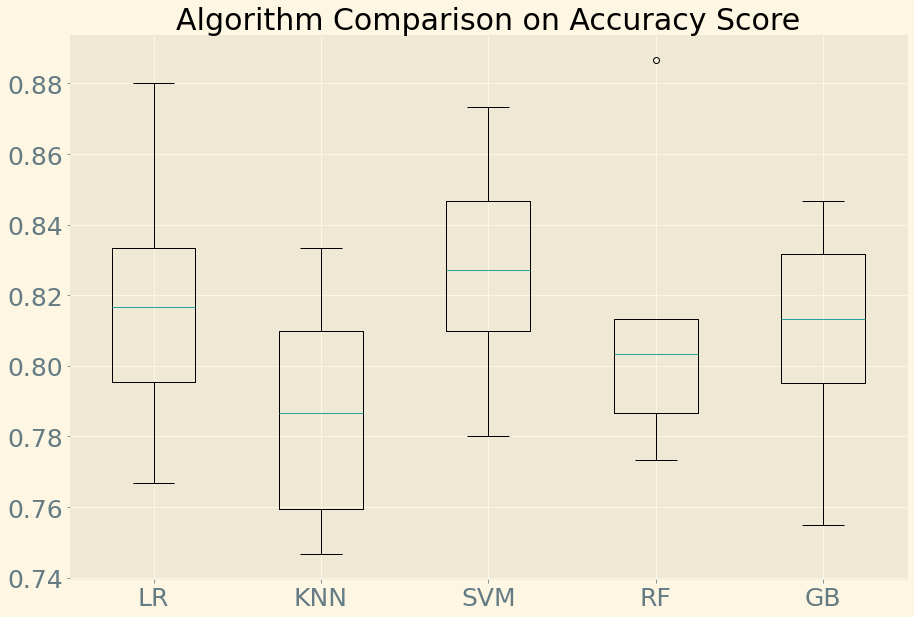

In [46]:
plt.rcParams['font.size'] = 25
fig, ax = plt.subplots(figsize=(15,10))
plt.title("Algorithm Comparison on Accuracy Score", fontsize = 30)
plt.boxplot(results);
ax.set_xticklabels(names);

In [ ]:
# Continue with Support Vector Classifier

In [ ]:
# Problem der bereits skalierten Date: Data Leakage